# Курсовой проект по курсу "Python для Data Science"

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

### Выгрузка и разбиение данных

In [2]:
data = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
from sklearn.model_selection import train_test_split 

In [5]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [6]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9069,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,B,B,6,1437,3,NaN,0,2,B,88504.384965
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663
7738,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,B,B,43,7227,0,NaN,1,6,A,182126.280899
1579,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705
5058,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,B,B,16,4048,3,NaN,1,3,B,322048.433990


In [7]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [8]:
columns = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2']

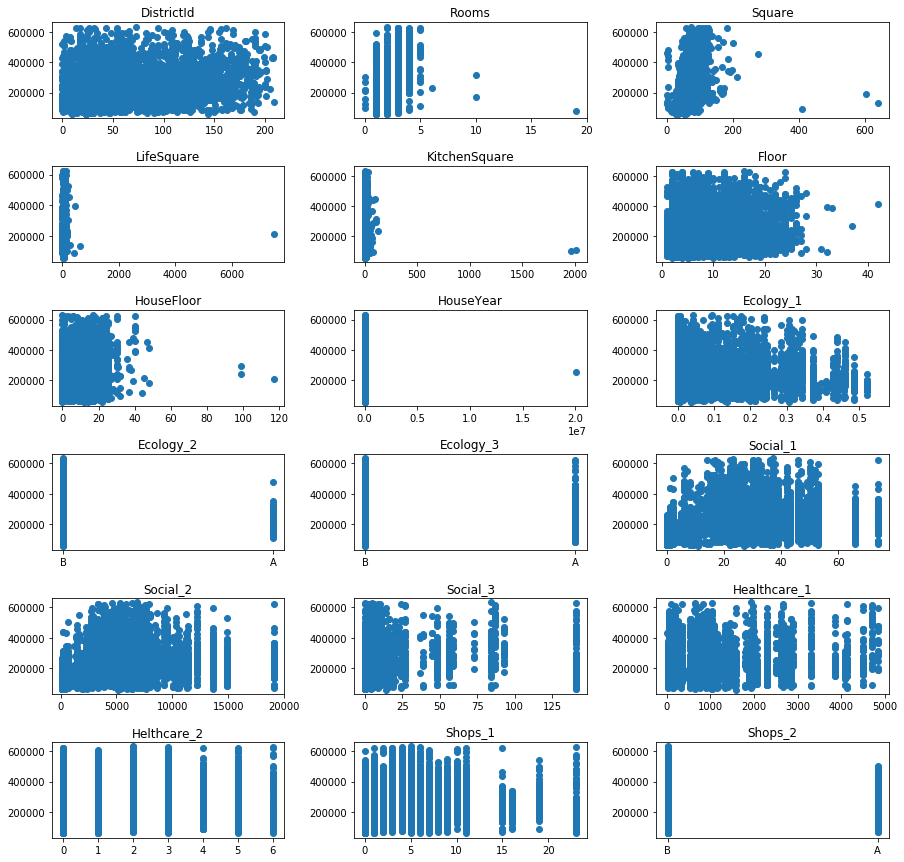

In [9]:
fig, ax = plt.subplots(nrows=6, ncols=3)
ax = ax.flatten()
for i, j in enumerate(columns):
    ax[i].scatter(data[j], data['Price'])
    ax[i].set_title(j)
fig.set_size_inches(15, 15)
plt.subplots_adjust(wspace=0.3, hspace=0.5)

из графиков видно, что некоторые данны выбиваются из общей массы

#### Обработка данных

Rooms

In [10]:
#рассмотрим квартиры, в которых больше 5 комнат
train.loc[train['Rooms'] > 5, ['Id','Rooms', 'Square', 'KitchenSquare', 'HouseYear', 'Price']]

,Id,Rooms,Square,KitchenSquare,HouseYear,Price
1454,8491,19.0,42.006046,7.0,2014,78364.616704
2170,14003,6.0,59.414334,6.0,1969,229661.964416
377,5927,10.0,59.056975,10.0,2002,317265.323792


In [11]:
train.loc[train['Rooms'].isin([1,2,3,4,5]), ['Rooms', 'Price','Square']].groupby('Rooms').median()

,Price,Square
Rooms,,
1.0,155464.088358,40.352571
2.0,200701.519690,55.950652
3.0,269162.365906,77.443890
4.0,376419.535842,98.686703
5.0,445110.375046,111.185575


In [12]:
#заменим большие значения комнат на те, которые наиболее соответствуют по значению площади
train.loc[train['Id'].isin([5927, 14003]), 'Rooms'] = 2
train.loc[train['Id'] == 8491, 'Rooms'] = 1

In [13]:
valid.loc[valid['Rooms'] > 5, ['Id','Rooms', 'Square', 'KitchenSquare', 'HouseYear', 'Price']]

,Id,Rooms,Square,KitchenSquare,HouseYear,Price
8849,14865,10.0,60.871266,10.0,1994,172329.270863


In [14]:
valid.loc[valid['Id'] == 14865, 'Rooms'] = 2

In [15]:
test.loc[test['Rooms'] > 5, ['Id','Rooms', 'Square', 'KitchenSquare', 'HouseYear', 'Price']]

,Id,Rooms,Square,KitchenSquare,HouseYear,Price
2071,10793,6.0,110.750226,0.0,2015,NaN
3217,4058,6.0,223.453689,16.0,2017,NaN
3398,1435,17.0,52.866107,8.0,1987,NaN


In [16]:
test.loc[test['Id'] == 1435, 'Rooms'] = 2

In [17]:
#посмотрим на данные по квартирам с числом комнат 0
train.loc[train['Rooms'] < 1, ['Id','Rooms','Square','Price','KitchenSquare']].sort_values(['Square'])

,Id,Rooms,Square,Price,KitchenSquare
4853,3224,0.0,2.377248,126596.941798,0.0
2269,7317,0.0,41.790881,98129.976788,0.0
3911,770,0.0,49.483501,217009.338463,0.0
4366,456,0.0,81.491446,212864.799112,0.0
1397,12638,0.0,138.427694,268394.744389,0.0


In [18]:
#заменим нулевые значения комнат на те, которые наиболее соответствуют по значению площади и/или цене
train.loc[train['Id'].isin([3224, 7317]), 'Rooms'] = 1
train.loc[train['Id'] == 770, 'Rooms'] = 2
train.loc[train['Id'] == 456, 'Rooms'] = 3
train.loc[train['Id'] == 12638, 'Rooms'] = 4

In [19]:
valid.loc[valid['Rooms'] < 1, ['Id','Rooms','Square','Price','KitchenSquare']].sort_values(['Square'])

,Id,Rooms,Square,Price,KitchenSquare
6149,3159,0.0,38.697117,158998.110646,9.0
8834,9443,0.0,87.762616,219281.918007,0.0
1981,7917,0.0,212.932361,302211.260887,0.0


In [20]:
valid.loc[valid['Id'] == 3159, 'Rooms'] = 1
valid.loc[valid['Id'] == 9443, 'Rooms'] = 3
valid.loc[valid['Id'] == 7917, 'Rooms'] = 5

In [21]:
test.loc[test['Rooms'] < 1, ['Id','Rooms','Square','Price','KitchenSquare']].sort_values(['Square'])

,Id,Rooms,Square,Price,KitchenSquare
2524,10729,0.0,76.345154,NaN,12.0
2406,3343,0.0,116.824201,NaN,0.0


In [22]:
test.loc[test['Id'] == 10729, 'Rooms'] = 3
test.loc[test['Id'] == 10729, 'Rooms'] = 5

Square

In [23]:
#проверим значения, выбивающиеся "вверх"
train.loc[train['Square'] > 200, ['Id', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Price']]

,Id,Rooms,Square,LifeSquare,KitchenSquare,Price
9910,16568,4.0,200.334539,201.627361,25.0,528560.506016
4262,28,2.0,604.705972,NaN,1.0,187717.242538
4690,2307,1.0,409.425181,410.639749,10.0,90470.430830


In [24]:
#разделим квартиры с большой площадью и небольшим количеством комнат на 10
train.loc[train['Id'].isin([28, 2307]), ['Square']] = train.loc[train['Id'].isin([28, 2307]), ['Square', 'LifeSquare']] / 10

In [25]:
valid.loc[valid['Square'] > 200, ['Id', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Price']]

,Id,Rooms,Square,LifeSquare,KitchenSquare,Price
6977,11602,2.0,641.065193,638.163193,10.0,133529.681562
1981,7917,5.0,212.932361,211.231125,0.0,302211.260887
1982,5548,5.0,275.645284,233.949309,26.0,455264.882666


In [26]:
valid.loc[valid['Id'].isin([11602]), ['Square']] = valid.loc[valid['Id'].isin([11602]), ['Square', 'LifeSquare']] / 10

In [27]:
test.loc[test['Square'] > 200, ['Id', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Price']]

,Id,Rooms,Square,LifeSquare,KitchenSquare,Price
3217,4058,6.0,223.453689,104.113552,16.0,NaN
3909,1397,3.0,221.138768,118.055342,4.0,NaN


In [28]:
#значение выбивающиеся вниз
train.loc[train['Square'] < 15, ['Id', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Price']].sort_values(['Price'])

,Id,Rooms,Square,LifeSquare,KitchenSquare,Price
4739,12676,3.0,13.784865,15.988889,7.0,78388.806186
3280,10527,1.0,4.380726,40.805837,1.0,97560.720383
1316,11526,1.0,4.633498,1.969969,1.0,107604.269441
4853,3224,1.0,2.377248,0.873147,0.0,126596.941798
8030,13265,3.0,4.823679,79.767964,0.0,237716.681261
3413,9487,1.0,5.129222,5.549458,1.0,369472.403061
9294,6782,1.0,2.954309,5.257278,1.0,438005.182323
9613,7657,1.0,4.502784,4.618547,1.0,483283.488083


In [29]:
#замена низких значений на медиану, в соответствии с кол-вом комнат
train.loc[train['Id'].isin([12676, 13265]), ['Square']] = 77.446321
train.loc[train['Id'].isin([10527, 11526, 3224, 9487, 6782, 7657]), ['Square']] = 40.353135

In [30]:
valid.loc[valid['Square'] < 15, ['Id', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Price']].sort_values(['Price'])

,Id,Rooms,Square,LifeSquare,KitchenSquare,Price
1608,10202,1.0,2.596351,4.604943,1.0,137597.601458
4900,4504,3.0,4.390331,5.610772,1.0,161379.067034
6392,14786,1.0,1.136859,4.525736,1.0,181434.825589
212,1748,2.0,5.497061,67.628717,1.0,412511.088764
8283,15744,1.0,1.988943,2.642219,1.0,458378.777006


In [31]:
valid.loc[valid['Id'].isin([10202, 14786, 15744]), ['Square']] = 40.353135
valid.loc[valid['Id'].isin([1748]), ['Square']] = 55.957969
valid.loc[valid['Id'].isin([4504]), ['Square']] = 77.446321

In [32]:
test.loc[test['Square'] < 15, ['Id', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Price']].sort_values(['Price'])

,Id,Rooms,Square,LifeSquare,KitchenSquare,Price
2,5480,1.0,13.597819,15.948246,12.0,NaN
66,9011,1.0,1.378543,1.353573,1.0,NaN
608,16401,1.0,2.645046,4.338755,1.0,NaN
837,2138,1.0,5.647458,1.501582,1.0,NaN
1165,10120,1.0,5.100672,3.861780,1.0,NaN
3697,15435,1.0,13.305531,9.495367,0.0,NaN
4490,1165,1.0,2.372101,1.899119,1.0,NaN
4540,7855,1.0,4.967143,2.968086,1.0,NaN
4713,170,2.0,2.900586,61.468563,1.0,NaN
4902,1420,1.0,1.975769,2.900371,1.0,NaN


In [33]:
test.loc[test['Id'].isin([5480, 9011, 16401, 2138, 10120, 15435, 1165, 7855, 1420]), ['Square']] = 40.353135
test.loc[test['Id'].isin([170]), ['Square']] = 55.957969

LifeSquare

In [34]:
#значение, сильно выбивающиеся вверх
train.loc[train['LifeSquare'] > 2000, ['Id', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Price']]

,Id,Rooms,Square,LifeSquare,KitchenSquare,Price
4328,16550,3.0,81.694417,7480.592129,1.0,217357.492366


In [35]:
train.loc[train['Id'].isin([16550]), ['LifeSquare']] = 81.694417

In [36]:
#рассмотрим квартиры, в которых жилая площадь превышает общую
train[train['LifeSquare'] > train['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1579,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705
2683,3207,52,3.0,80.288769,81.668797,0.0,10,17.0,1977,0.371149,B,B,34,7065,1,750.0,2,5,B,181796.476207
3815,11775,37,2.0,68.206948,68.325237,1.0,3,9.0,2016,0.178917,B,B,18,3594,4,192.0,1,5,B,285114.308471
1108,2150,34,2.0,61.673568,61.762322,1.0,14,14.0,2018,0.069753,B,B,53,13670,4,NaN,1,11,B,269906.912907
3495,12863,27,1.0,36.181445,38.075191,0.0,2,12.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,88623.960046
4222,12687,27,2.0,65.444497,68.614227,0.0,7,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,146247.605596
4834,15523,63,1.0,49.039357,50.957360,10.0,19,25.0,2018,0.238617,B,B,26,3889,6,705.0,3,6,B,287806.693410
9250,2905,62,2.0,74.393929,76.775595,0.0,2,2.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,187744.555119
9003,16015,62,3.0,85.726420,86.836992,1.0,11,9.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,182964.744574
6041,13875,20,1.0,28.438794,32.514021,6.0,6,10.0,2014,0.019509,B,B,37,7687,11,176.0,5,5,B,199248.114376


In [37]:
#замена жилой площади на общую, если она больше
def lifesq_change(df):
    lifesq_ch = df[df['LifeSquare'] > df['Square']].index
    lifesq_ch
    df.loc[lifesq_ch, 'LifeSquare'] = round(df['Square'] - 0,5)
    return df

In [38]:
train = lifesq_change(train)

In [39]:
valid = lifesq_change(valid)

In [40]:
test = lifesq_change(test)

KitchenSquare

In [41]:
#рассмотрим квартиры, в которых площадь кухни превышает общую
train[train['KitchenSquare'] > train['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
5149,13703,42,1.0,38.071692,19.723548,73.0,9,10.0,2006,0.158249,B,B,21,5731,0,NaN,1,0,B,160488.033165
7088,6569,27,1.0,38.220258,18.716856,84.0,4,17.0,2018,0.011654,B,B,4,915,0,NaN,0,0,B,99079.960518


In [42]:
#замена площади кухни на общую, если она больше
def kitchensq_change(df):
    kitchensq_ch = df[df['KitchenSquare'] > df['Square']].index
    kitchensq_ch
    df.loc[kitchensq_ch, 'KitchenSquare'] = round(df['Square'] - 0,5)
    return df

In [43]:
train = kitchensq_change(train)

In [44]:
valid = kitchensq_change(valid)

In [45]:
test = kitchensq_change(test)

HouseFloor & Floor

In [46]:
#рассмотрим дома, в которых количество этажей больше 50
train.loc[train['HouseFloor'] > 50]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8854,78,30,2.0,65.773749,65.773750,1.0,8,117.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,207248.370520
6131,10806,5,1.0,51.944587,48.709601,1.0,6,99.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,296127.115515
8599,9300,74,2.0,71.747869,71.747870,9.0,5,99.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,243329.912579


In [47]:
#заменним 117 этаж на 17, а 99 на 9
def housefloor_corr(df):
    df.loc[df['HouseFloor'] == 99, 'HouseFloor'] = 9
    df.loc[df['HouseFloor'] == 117, 'HouseFloor'] = 17
    return df

In [48]:
valid.loc[valid['HouseFloor'] > 50]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [49]:
train = housefloor_corr(train)

In [50]:
test = housefloor_corr(test)

In [51]:
#Значение общего количества этажей в доме не может быть меньше, чем номер этажа для данной квартиры
#Поменяем местами этажность дома и номер этажа для всех Id, где они несоответвтуют 
def  housefloor_change(df):
    floors_index = df[df['HouseFloor'] < df['Floor']].index
    df.loc[floors_index, 'Floor'], df.loc[floors_index, 'HouseFloor'] = df.loc[floors_index, 'HouseFloor'], df.loc[floors_index, 'Floor']
    return df

In [52]:
train = housefloor_change(train)

In [53]:
valid = housefloor_change(valid)

In [54]:
test = housefloor_change(test)

HouseYear

In [55]:
#проверим значения, выбивающиеся "вверх"
train.loc[train['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4189,11607,147,2.0,44.791836,28.360393,5.0,4.0,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096
1497,10814,109,1.0,37.265070,20.239714,9.0,9.0,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396


In [56]:
#скорее всего 20052011 это года строительства 2005-2011, заменим на срок окончания, т.е. 2011
train.loc[train['HouseYear'] == 20052011, 'HouseYear'] = 2011

# 4968 поменяем на 1968
train.loc[train['HouseYear'] == 4968, 'HouseYear'] = 1968

Переведение категориальных признаков в числовой вид

In [57]:
def get_cat_features(df):
    df.loc[df['Ecology_2']=='A', 'Ecology_2'] = 1
    df.loc[df['Ecology_2']=='B', 'Ecology_2'] = 2
    df.loc[df['Ecology_3']=='A', 'Ecology_3'] = 1
    df.loc[df['Ecology_3']=='B', 'Ecology_3'] = 2
    df.loc[df['Shops_2']=='A', 'Shops_2'] = 1
    df.loc[df['Shops_2']=='B', 'Shops_2'] = 2
    return df

In [58]:
train = get_cat_features(train)

In [59]:
valid = get_cat_features(valid)

In [60]:
test = get_cat_features(test)

In [61]:
#для постороения модели переведем признаки, имеющие по факту целочисленные значения в int
def int_prep(df, cat_feats=['Rooms', 'KitchenSquare', 'Square', 'Floor', 'HouseFloor', 'Ecology_1', 'Price']):
    for col in cat_feats:
        df.loc[:, col] = df[col].astype(int)
    return df

In [62]:
train = int_prep(train)

### Построение модели

In [64]:
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.metrics import r2_score as r2

In [65]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [66]:
feats = ['DistrictId', 'Rooms', 'Square', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
       'Helthcare_2', 'Shops_1', 'Shops_2']

In [67]:
model = RF(n_estimators=225, max_depth=16, max_features=8, random_state=42)

In [68]:
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=225, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [69]:
pred_train = model.predict(train.loc[:, feats])

In [70]:
pred_valid = model.predict(valid.loc[:, feats])

In [71]:
r2(train['Price'], pred_train)

0.9467998803778949

In [72]:
r2(valid['Price'], pred_valid)

0.7306755453516192

### Предсказания по test и выгрузка данных

In [73]:
test['Price'] = model.predict(test.loc[:, feats])

In [74]:
test.loc[:, ['Id', 'Price']].to_csv('VKazakova_predictions.csv', index=False)